# Identifying Effect using ID Algorithm

This is a tutorial notebook for using the ID Algorithm in the causal identification step of causal inference.

Link to paper: https://ftp.cs.ucla.edu/pub/stat_ser/shpitser-thesis.pdf
The pseudo code has been provided on Pg 40.
        

In [1]:
from dowhy import CausalModel
import pandas as pd
import numpy as np
from IPython.display import Image, display


## Examples

The following sections show the working of the ID Algorithm on multiple test cases. In the graphs, **T** denotes the treatment variable, **Y** denotes the outcome variable and the **Xs** are additional variables.

## Case 1

This example exhibits the performance of the algorithm on the simplest possible graph.

Graph:


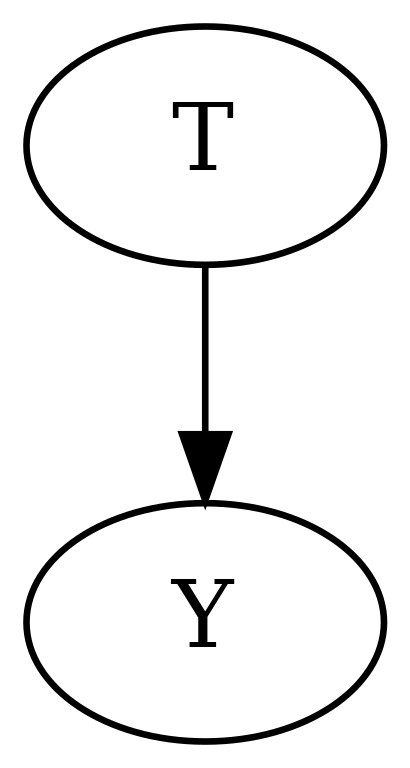


Result for identification using ID Algorithm:
Predictor: P(Y|T)


In [2]:
# Random data
treatment = "T"
outcome = "Y"
causal_graph = "digraph{T->Y;}"
columns = list(treatment) + list(outcome)
df = pd.DataFrame(columns=columns)

# Causal Model Initialization
causal_model = CausalModel(df, treatment, outcome, graph=causal_graph)

# View graph
causal_model.view_model()
from IPython.display import Image, display
print("Graph:")
display(Image(filename="causal_model.png"))

# Causal Identification using the ID Algorithm
identified_estimand = causal_model.identify_effect(method_name="id-algorithm")
print("\nResult for identification using ID Algorithm:")
print(identified_estimand)


## Case 2

This example exhibits the performance of the algorithm on a cyclic graph. This example demonstrates that a directed acyclic graph (DAG) is needed for the ID algorithm.

Graph:


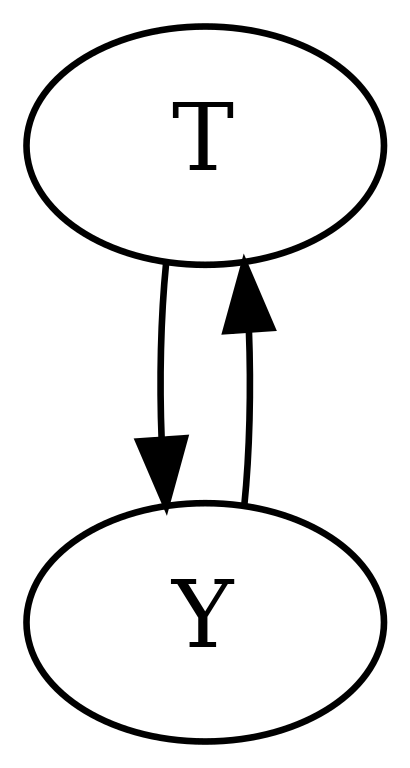

Identification Failed: The graph must be a directed acyclic graph (DAG).


In [3]:
# Random data
treatment = "T"
outcome = "Y"
causal_graph = "digraph{T->Y; Y->T;}"
columns = list(treatment) + list(outcome)
df = pd.DataFrame(columns=columns)

# Causal Model Initialization
causal_model = CausalModel(df, treatment, outcome, graph=causal_graph)

# View graph
causal_model.view_model()
from IPython.display import Image, display
print("Graph:")
display(Image(filename="causal_model.png"))

try:
    # Causal Identification using the ID Algorithm
    identified_estimand = causal_model.identify_effect(method_name="id-algorithm")
    print("\nResult for identification using ID Algorithm:")
    print(identified_estimand)
except:
    print("Identification Failed: The graph must be a directed acyclic graph (DAG).")


## Case 3

This example exhibits the performance of the algorithm in the presence of a mediator variable(**X1**).

Graph:


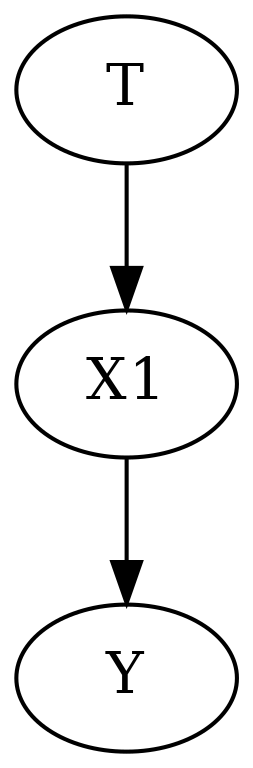


Result for identification using ID Algorithm:
Sum over {X1}:
	Predictor: P(X1|T)
	Predictor: P(Y|T,X1)


In [4]:
# Random data
treatment = "T"
outcome = "Y"
variables = ["X1"]
causal_graph = "digraph{T->X1;X1->Y;}"
columns = list(treatment) + list(outcome) + list(variables)
df = pd.DataFrame(columns=columns)

# Causal Model Initialization
causal_model = CausalModel(df, treatment, outcome, graph=causal_graph)

# View graph
causal_model.view_model()
from IPython.display import Image, display
print("Graph:")
display(Image(filename="causal_model.png"))

# Causal Identification using the ID Algorithm
identified_estimand = causal_model.identify_effect(method_name="id-algorithm")
print("\nResult for identification using ID Algorithm:")
print(identified_estimand)


## Case 4

The example exhibits the performance of the algorithm in the presence of a direct and indirect path(through **X1**) from **T** to **Y**.

Graph:


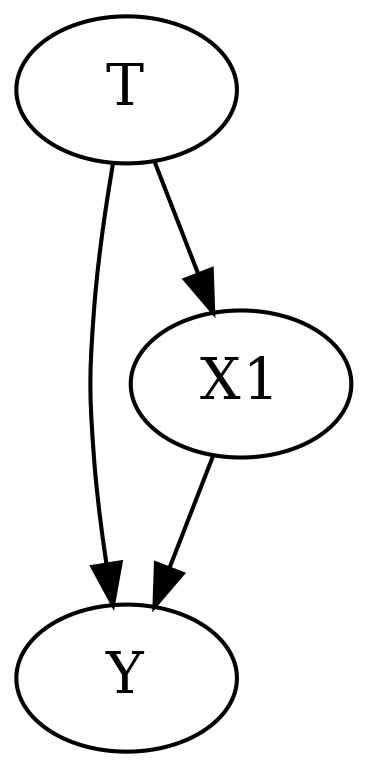


Result for identification using ID Algorithm:
Sum over {X1}:
	Predictor: P(Y|T,X1)
	Predictor: P(X1|T)


In [5]:
# Random data
treatment = "T"
outcome = "Y"
variables = ["X1"]
causal_graph = "digraph{T->Y;T->X1;X1->Y;}"
columns = list(treatment) + list(outcome) + list(variables)
df = pd.DataFrame(columns=columns)

# Causal Model Initialization
causal_model = CausalModel(df, treatment, outcome, graph=causal_graph)

# View graph
causal_model.view_model()
from IPython.display import Image, display
print("Graph:")
display(Image(filename="causal_model.png"))

# Causal Identification using the ID Algorithm
identified_estimand = causal_model.identify_effect(method_name="id-algorithm")
print("\nResult for identification using ID Algorithm:")
print(identified_estimand)


# Case 5

This example exhibits the performance of the algorithm in the presence of a confounding variable(**X1**) and an instrumental variable(**X2**).

Graph:


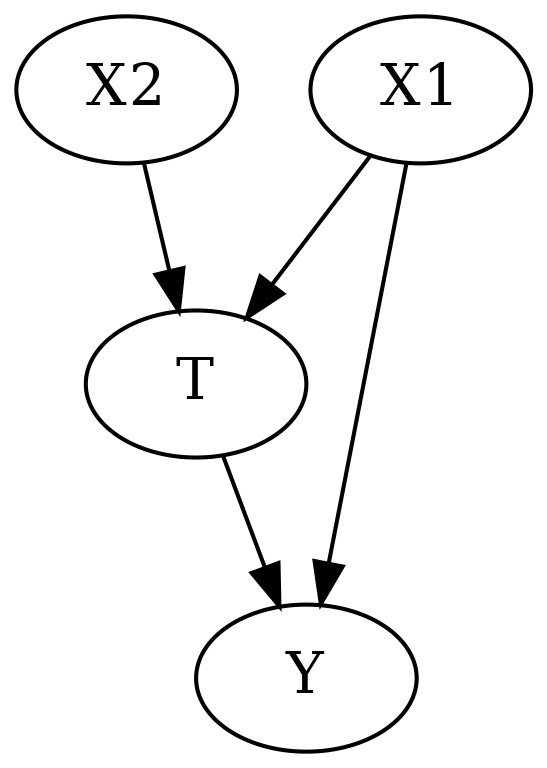


Result for identification using ID Algorithm:
Sum over {X1}:
	Predictor: P(Y|X2,X1,T)
	Predictor: P(X1)


In [6]:
# Random data
treatment = "T"
outcome = "Y"
variables = ["X1", "X2"]
causal_graph = "digraph{T->Y;X1->T;X1->Y;X2->T;}"
columns = list(treatment) + list(outcome) + list(variables)
df = pd.DataFrame(columns=columns)

# Causal Model Initialization
causal_model = CausalModel(df, treatment, outcome, graph=causal_graph)

# View graph
causal_model.view_model()
from IPython.display import Image, display
print("Graph:")
display(Image(filename="causal_model.png"))

# Causal Identification using the ID Algorithm
identified_estimand = causal_model.identify_effect(method_name="id-algorithm")
print("\nResult for identification using ID Algorithm:")
print(identified_estimand)


## Case 6

This example exhibits the performance of the algorithm in case of a disjoint graph.

Graph:


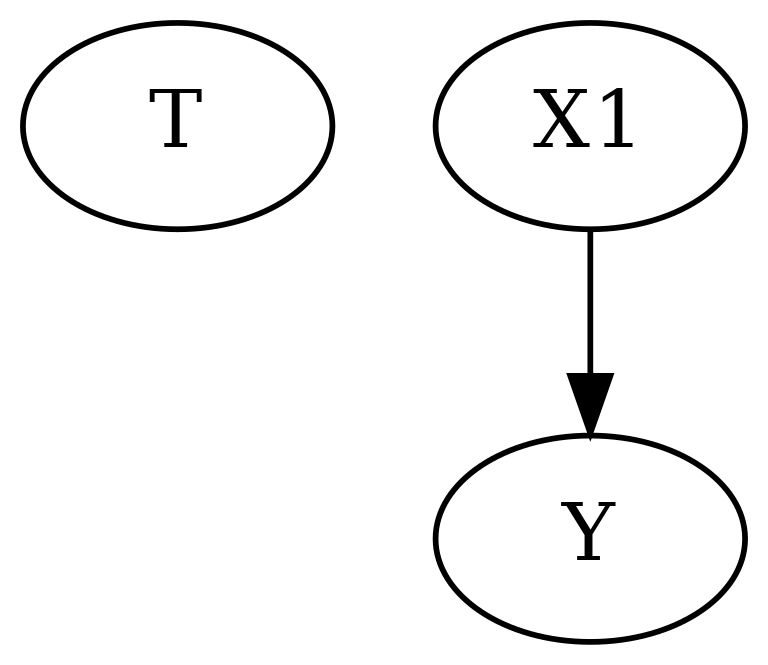


Result for identification using ID Algorithm:
Sum over {X1}:
	Predictor: P(X1,Y)


In [7]:
# Random data
treatment = "T"
outcome = "Y"
variables = ["X1"]
causal_graph = "digraph{T;X1->Y;}"
columns = list(treatment) + list(outcome) + list(variables)
df = pd.DataFrame(columns=columns)

# Causal Model Initialization
causal_model = CausalModel(df, treatment, outcome, graph=causal_graph)

# View graph
causal_model.view_model()
from IPython.display import Image, display
print("Graph:")
display(Image(filename="causal_model.png"))

# Causal Identification using the ID Algorithm
identified_estimand = causal_model.identify_effect(method_name="id-algorithm")
print("\nResult for identification using ID Algorithm:")
print(identified_estimand)
